**Problem Statement: ATM CASH PREDICTION**

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#!pip3 uninstall statsmodels

In [ ]:
!pip3 install numpy scipy patsy pandas


In [ ]:

!pip3 install statsmodels

In [ ]:
import statsmodels.api as sm

In [ ]:
#Loading the dataset 
atm = pd.read_csv('atm bank dataset.csv')
atm

,Unnamed: 0,atm_name,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,11,Mount Road ATM,MONDAY,NH,W,WWW,1,1,2011,648600,897100
1,16,Mount Road ATM,TUESDAY,NH,W,WWW,1,1,2011,648600,826000
2,21,Mount Road ATM,WEDNESDAY,NH,W,WWW,1,1,2011,648600,754400
3,26,Mount Road ATM,THURSDAY,NH,W,WWW,2,1,2011,648600,834200
4,31,Mount Road ATM,FRIDAY,NH,W,WWW,2,1,2011,648600,575300
...,...,...,...,...,...,...,...,...,...,...,...
2239,11565,Mount Road ATM,MONDAY,NH,W,HWW,5,9,2017,276058,447400
2240,11570,Mount Road ATM,TUESDAY,NH,W,WWW,6,9,2017,276058,153800
2241,11575,Mount Road ATM,WEDNESDAY,NH,W,WWW,6,9,2017,276058,167100
2242,11580,Mount Road ATM,THURSDAY,NH,W,WWH,6,9,2017,276058,317400


In [ ]:
#Knowing the dataset
atm.head()

,Unnamed: 0,atm_name,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,11,Mount Road ATM,MONDAY,NH,W,WWW,1,1,2011,648600,897100
1,16,Mount Road ATM,TUESDAY,NH,W,WWW,1,1,2011,648600,826000
2,21,Mount Road ATM,WEDNESDAY,NH,W,WWW,1,1,2011,648600,754400
3,26,Mount Road ATM,THURSDAY,NH,W,WWW,2,1,2011,648600,834200
4,31,Mount Road ATM,FRIDAY,NH,W,WWW,2,1,2011,648600,575300


In [ ]:
atm.tail()

,Unnamed: 0,atm_name,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
2239,11565,Mount Road ATM,MONDAY,NH,W,HWW,5,9,2017,276058,447400
2240,11570,Mount Road ATM,TUESDAY,NH,W,WWW,6,9,2017,276058,153800
2241,11575,Mount Road ATM,WEDNESDAY,NH,W,WWW,6,9,2017,276058,167100
2242,11580,Mount Road ATM,THURSDAY,NH,W,WWH,6,9,2017,276058,317400
2243,11585,Mount Road ATM,FRIDAY,H,H,WHH,6,9,2017,276058,305100


In [ ]:
print(atm.shape)
print(atm.columns)
print(atm.info)
print(atm.describe().astype(int))
print(atm.dtypes)

(2244, 11)
Index(['Unnamed: 0', 'atm_name', 'weekday', 'festival_religion', 'working_day',
       'holiday_sequence', 'trans_date_set', 'trans_month', 'trans_year',
       'prevweek_mean', 'total_amount_withdrawn'],
      dtype='object')
<bound method DataFrame.info of       Unnamed: 0        atm_name  ... prevweek_mean total_amount_withdrawn
0             11  Mount Road ATM  ...        648600                 897100
1             16  Mount Road ATM  ...        648600                 826000
2             21  Mount Road ATM  ...        648600                 754400
3             26  Mount Road ATM  ...        648600                 834200
4             31  Mount Road ATM  ...        648600                 575300
...          ...             ...  ...           ...                    ...
2239       11565  Mount Road ATM  ...        276058                 447400
2240       11570  Mount Road ATM  ...        276058                 153800
2241       11575  Mount Road ATM  ...        276058    

In [ ]:
#Making New Variables using holiday sequence
previousday_holiday = atm['holiday_sequence'].apply(lambda x: 'W' if x == 'WWW' or x == 'WHW' or x == 'WWH' or x == 'WHH' else 'H') 
print(previousday_holiday)
nextday_holiday = atm['holiday_sequence'].apply(lambda x: 'H' if x == 'HHH' or x == 'WHH' or x == 'WWH' or x == 'HWH' else 'W') 
print(nextday_holiday)

0       W
1       W
2       W
3       W
4       W
       ..
2239    H
2240    W
2241    W
2242    W
2243    W
Name: holiday_sequence, Length: 2244, dtype: object
0       W
1       W
2       W
3       W
4       W
       ..
2239    W
2240    W
2241    W
2242    H
2243    H
Name: holiday_sequence, Length: 2244, dtype: object


In [ ]:
holidays = pd.DataFrame({'previousday_holiday': previousday_holiday,'nextday_holiday': nextday_holiday})
holidays

,previousday_holiday,nextday_holiday
0,W,W
1,W,W
2,W,W
3,W,W
4,W,W
...,...,...
2239,H,W
2240,W,W
2241,W,W
2242,W,H


In [ ]:
atm1 = pd.concat([atm,holidays],axis = 1)
atm1

,Unnamed: 0,atm_name,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn,previousday_holiday,nextday_holiday
0,11,Mount Road ATM,MONDAY,NH,W,WWW,1,1,2011,648600,897100,W,W
1,16,Mount Road ATM,TUESDAY,NH,W,WWW,1,1,2011,648600,826000,W,W
2,21,Mount Road ATM,WEDNESDAY,NH,W,WWW,1,1,2011,648600,754400,W,W
3,26,Mount Road ATM,THURSDAY,NH,W,WWW,2,1,2011,648600,834200,W,W
4,31,Mount Road ATM,FRIDAY,NH,W,WWW,2,1,2011,648600,575300,W,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,11565,Mount Road ATM,MONDAY,NH,W,HWW,5,9,2017,276058,447400,H,W
2240,11570,Mount Road ATM,TUESDAY,NH,W,WWW,6,9,2017,276058,153800,W,W
2241,11575,Mount Road ATM,WEDNESDAY,NH,W,WWW,6,9,2017,276058,167100,W,W
2242,11580,Mount Road ATM,THURSDAY,NH,W,WWH,6,9,2017,276058,317400,W,H


In [ ]:
#Dropping the insignifcant columns
atm1 = atm1.drop(atm1.columns[[0,1,5]],axis=1)
atm1

,weekday,festival_religion,working_day,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn,previousday_holiday,nextday_holiday
0,MONDAY,NH,W,1,1,2011,648600,897100,W,W
1,TUESDAY,NH,W,1,1,2011,648600,826000,W,W
2,WEDNESDAY,NH,W,1,1,2011,648600,754400,W,W
3,THURSDAY,NH,W,2,1,2011,648600,834200,W,W
4,FRIDAY,NH,W,2,1,2011,648600,575300,W,W
...,...,...,...,...,...,...,...,...,...,...
2239,MONDAY,NH,W,5,9,2017,276058,447400,H,W
2240,TUESDAY,NH,W,6,9,2017,276058,153800,W,W
2241,WEDNESDAY,NH,W,6,9,2017,276058,167100,W,W
2242,THURSDAY,NH,W,6,9,2017,276058,317400,W,H


In [ ]:
pd.crosstab(atm1['trans_month'],atm1['trans_year'])
#This shows us that we do not per day data i.e daily data in a month 

trans_year,2011,2012,2013,2014,2015,2016,2017
trans_month,,,,,,,
1,29,31,30,31,31,6,7
2,28,29,28,28,28,24,23
3,31,31,30,31,31,23,26
4,30,30,29,29,30,23,29
5,31,31,31,31,31,18,31
6,30,29,30,30,30,16,30
7,31,31,31,31,30,23,31
8,31,30,31,31,31,30,27
9,30,30,30,30,30,28,29


In [ ]:
#Checking for missing values
print(atm1.isnull().sum())

weekday                   0
festival_religion         0
working_day               0
trans_date_set            0
trans_month               0
trans_year                0
prevweek_mean             0
total_amount_withdrawn    0
previousday_holiday       0
nextday_holiday           0
dtype: int64


*Exploratory Data Analysis*

Text(0.5, 1.0, 'Count of Categories of Festival Religion ')

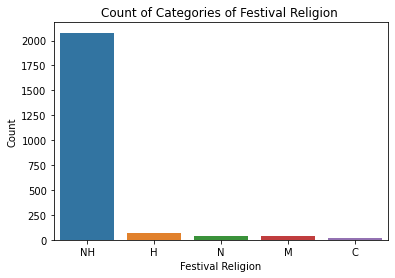

In [ ]:
sns.barplot(atm1['festival_religion'].value_counts().index,atm1['festival_religion'].value_counts())
plt.xlabel('Festival Religion')
plt.ylabel('Count')
plt.title('Count of Categories of Festival Religion ')

Text(0.5, 1.0, 'Count of Working day and Holiday ')

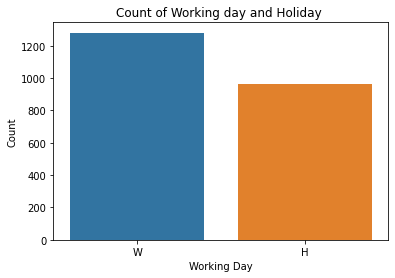

In [ ]:
sns.barplot(atm1['working_day'].value_counts().index,atm1['working_day'].value_counts())
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.title('Count of Working day and Holiday ')

Text(0.5, 1.0, 'Count of Previous Working day or Holiday ')

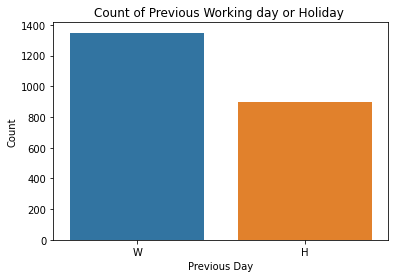

In [ ]:
sns.barplot(atm1['previousday_holiday'].value_counts().index,atm1['previousday_holiday'].value_counts())
plt.xlabel('Previous Day')
plt.ylabel('Count')
plt.title('Count of Previous Working day or Holiday ')

Text(0.5, 1.0, 'Count of Next Working day or Holiday ')

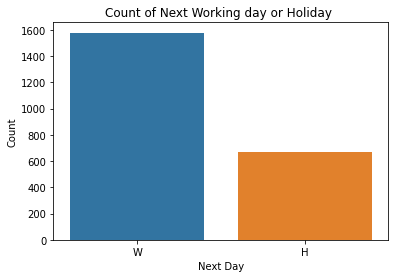

In [ ]:
sns.barplot(atm1['nextday_holiday'].value_counts().index,atm1['nextday_holiday'].value_counts())
plt.xlabel('Next Day')
plt.ylabel('Count')
plt.title('Count of Next Working day or Holiday ')

Text(0.5, 1.0, 'Total Amount Withdrawn vs Previous Week Mean')

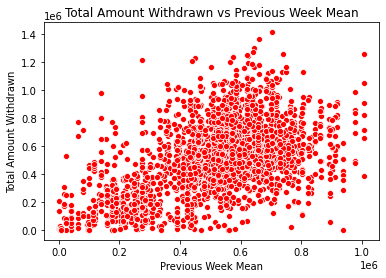

In [ ]:
sns.scatterplot(atm1['prevweek_mean'],atm1['total_amount_withdrawn'],color = 'Red')
plt.xlabel('Previous Week Mean')
plt.ylabel('Total Amount Withdrawn')
plt.title('Total Amount Withdrawn vs Previous Week Mean')
#Here we can see a positive relation Total money withdrawn and Previous week mean 

In [ ]:
atm1.corr()
#None of the variables show strong correlation 

,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
trans_date_set,1.000000,-0.021240,0.012409,-0.139400,-0.273464
trans_month,-0.021240,1.000000,-0.069692,0.058217,0.038138
trans_year,0.012409,-0.069692,1.000000,-0.419636,-0.311817
prevweek_mean,-0.139400,0.058217,-0.419636,1.000000,0.502479
total_amount_withdrawn,-0.273464,0.038138,-0.311817,0.502479,1.000000


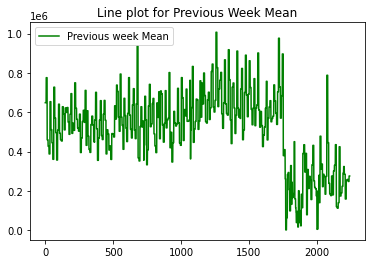

In [ ]:
#creating x data 
xdata = range(0,atm1.shape[0])

fig, ax = plt.subplots()
ax.plot(xdata,atm1['prevweek_mean'],label = 'Previous week Mean',color = 'green')

ax.set_title('Line plot for Previous Week Mean')
ax.legend()

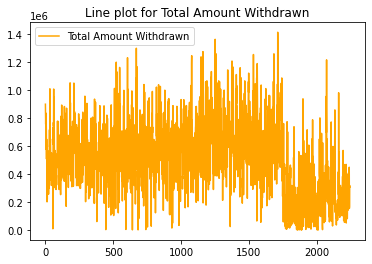

In [ ]:
#creating x data 
xdata = range(0,atm1.shape[0])

fig, ax = plt.subplots()
ax.plot(xdata,atm1['total_amount_withdrawn'],label = 'Total Amount Withdrawn',color = 'orange')

ax.set_title('Line plot for Total Amount Withdrawn')
ax.legend()

Text(0.5, 1.0, 'Boxplot')

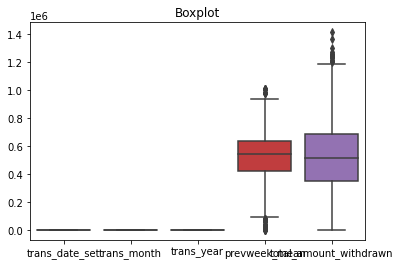

In [ ]:
sns.boxplot(data = atm1)
plt.title('Boxplot')
#The boxplot shows presence of outliers 

In [ ]:
#Finding Outliers 
from scipy import stats 

z = np.abs(stats.zscore(atm1.select_dtypes(include = ['number'])))
print(z)

threshold = 3
print(np.where(z>3))

atm2 = atm1[(z<3).all(axis = 1)]
print(atm2)
print(atm2.shape) #we can see 3 rows have been omitted 
print(atm2.columns)

[[1.45311408 1.63153695 1.41212142 0.69003026 1.49490144]
 [1.45311408 1.63153695 1.41212142 0.69003026 1.21621145]
 [1.45311408 1.63153695 1.41212142 0.69003026 0.93556162]
 ...
 [1.38729358 0.82500514 1.71344209 1.23540964 1.36647254]
 [1.38729358 0.82500514 1.71344209 1.23540964 0.77734307]
 [1.38729358 0.82500514 1.71344209 1.23540964 0.82555527]]
(array([ 670, 1251, 1712]), array([4, 4, 4]))
        weekday festival_religion  ... previousday_holiday  nextday_holiday
0        MONDAY                NH  ...                   W                W
1       TUESDAY                NH  ...                   W                W
2     WEDNESDAY                NH  ...                   W                W
3      THURSDAY                NH  ...                   W                W
4        FRIDAY                NH  ...                   W                W
...         ...               ...  ...                 ...              ...
2239     MONDAY                NH  ...                   H          

*Creating Dummy Variables*

In [ ]:
dummy = pd.get_dummies(atm2.select_dtypes(exclude= ['number']),drop_first= True)
dummy 

,weekday_MONDAY,weekday_SATURDAY,weekday_SUNDAY,weekday_THURSDAY,weekday_TUESDAY,weekday_WEDNESDAY,festival_religion_H,festival_religion_M,festival_religion_N,festival_religion_NH,working_day_W,previousday_holiday_W,nextday_holiday_W
0,1,0,0,0,0,0,0,0,0,1,1,1,1
1,0,0,0,0,1,0,0,0,0,1,1,1,1
2,0,0,0,0,0,1,0,0,0,1,1,1,1
3,0,0,0,1,0,0,0,0,0,1,1,1,1
4,0,0,0,0,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,1,0,0,0,0,0,0,0,0,1,1,0,1
2240,0,0,0,0,1,0,0,0,0,1,1,1,1
2241,0,0,0,0,0,1,0,0,0,1,1,1,1
2242,0,0,0,1,0,0,0,0,0,1,1,1,0


In [ ]:
atm3 = atm2.drop(atm2.columns[[0,1,2,8,9]],axis=1)
atm3

,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,1,1,2011,648600,897100
1,1,1,2011,648600,826000
2,1,1,2011,648600,754400
3,2,1,2011,648600,834200
4,2,1,2011,648600,575300
...,...,...,...,...,...
2239,5,9,2017,276058,447400
2240,6,9,2017,276058,153800
2241,6,9,2017,276058,167100
2242,6,9,2017,276058,317400


In [ ]:
atm3 = pd.concat([atm3,dummy],axis = 1)
atm3

,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn,weekday_MONDAY,weekday_SATURDAY,weekday_SUNDAY,weekday_THURSDAY,weekday_TUESDAY,weekday_WEDNESDAY,festival_religion_H,festival_religion_M,festival_religion_N,festival_religion_NH,working_day_W,previousday_holiday_W,nextday_holiday_W
0,1,1,2011,648600,897100,1,0,0,0,0,0,0,0,0,1,1,1,1
1,1,1,2011,648600,826000,0,0,0,0,1,0,0,0,0,1,1,1,1
2,1,1,2011,648600,754400,0,0,0,0,0,1,0,0,0,1,1,1,1
3,2,1,2011,648600,834200,0,0,0,1,0,0,0,0,0,1,1,1,1
4,2,1,2011,648600,575300,0,0,0,0,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,5,9,2017,276058,447400,1,0,0,0,0,0,0,0,0,1,1,0,1
2240,6,9,2017,276058,153800,0,0,0,0,1,0,0,0,0,1,1,1,1
2241,6,9,2017,276058,167100,0,0,0,0,0,1,0,0,0,1,1,1,1
2242,6,9,2017,276058,317400,0,0,0,1,0,0,0,0,0,1,1,1,0


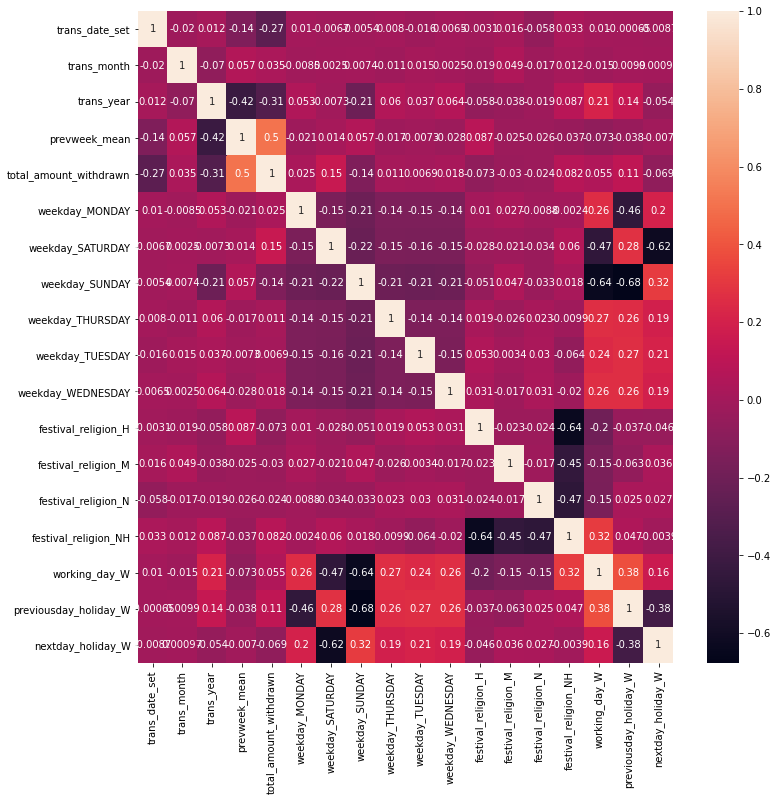

In [ ]:
corr = atm3.corr()

size = plt.figure(figsize= (12,12))
sns.heatmap(corr,annot= True)

#There isn't strong correlation beytween any of the variables indicating that there is no multicollinearity.

*Feature Selection*

In [ ]:
#Splitting the independent and dependent variables 
x = atm3.drop(columns='total_amount_withdrawn')
y = atm3['total_amount_withdrawn']

In [ ]:
import statsmodels.api as sm 

selc = sm.OLS(y,x).fit()
selc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     total_amount_withdrawn   R-squared (uncentered):                   0.874
Model:                                OLS   Adj. R-squared (uncentered):              0.873
Method:                     Least Squares   F-statistic:                              907.5
Date:                    Wed, 23 Sep 2020   Prob (F-statistic):                        0.00
Time:                            16:53:22   Log-Likelihood:                         -30574.
No. Observations:                    2241   AIC:                                  6.118e+04
Df Residuals:                        2224   BIC:                                  6.128e+04
Df Model:                              17                                                  
Covariance Type:                nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
trans_date_set        -2.956e+04   2489.143    -11.877      0.000   -3.44e+04   -2.47e+04
trans_month             167.6896   1334.403      0.126      0.900   -2449.117    2784.497
trans_year               79.2058     26.965      2.937      0.003      26.326     132.085
prevweek_mean             0.6457      0.023     28.441      0.000       0.601       0.690
weekday_MONDAY         5.444e+04   3.36e+04      1.621      0.105   -1.14e+04     1.2e+05
weekday_SATURDAY       1.809e+05   3.75e+04      4.823      0.000    1.07e+05    2.55e+05
weekday_SUNDAY         2.274e+04   4.58e+04      0.497      0.620   -6.71e+04    1.13e+05
weekday_THURSDAY       1.974e+04   2.71e+04      0.730      0.466   -3.33e+04    7.28e+04
weekday_TUESDAY        1.427e+04   2.72e+04      0.525      0.600   -3.91e+04    6.76e+04
weekday_WEDNESDAY      2.825e+04   2.69e+04      1.049      0.294   -2.46e+04    8.11e+04
festival_religion_H   -1.026e+05   5.25e+04     -1.953      0.051   -2.06e+05     408.475
festival_religion_M    3.268e+04   5.75e+04      0.569      0.570      -8e+04    1.45e+05
festival_religion_N    1.966e+04   5.66e+04      0.347      0.729   -9.14e+04    1.31e+05
festival_religion_NH   9390.1024   5.15e+04      0.182      0.855   -9.15e+04     1.1e+05
working_day_W           7.96e+04    3.5e+04      2.275      0.023     1.1e+04    1.48e+05
previousday_holiday_W  2.638e+04   2.21e+04      1.195      0.232   -1.69e+04    6.97e+04
nextday_holiday_W      1.951e+04   2.24e+04      0.871      0.384   -2.44e+04    6.34e+04
==============================================================================
Omnibus:                       40.470   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.998
Skew:                           0.256   Prob(JB):                     2.29e-11
Kurtosis:                       3.513   Cond. No.                     1.23e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.23e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x = x.drop(columns= 'trans_month')

In [ ]:
selc = sm.OLS(y,x).fit()
selc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     total_amount_withdrawn   R-squared (uncentered):                   0.874
Model:                                OLS   Adj. R-squared (uncentered):              0.873
Method:                     Least Squares   F-statistic:                              964.7
Date:                    Wed, 23 Sep 2020   Prob (F-statistic):                        0.00
Time:                            16:53:22   Log-Likelihood:                         -30574.
No. Observations:                    2241   AIC:                                  6.118e+04
Df Residuals:                        2225   BIC:                                  6.127e+04
Df Model:                              16                                                  
Covariance Type:                nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
trans_date_set        -2.957e+04   2488.225    -11.884      0.000   -3.44e+04   -2.47e+04
trans_year               79.5918     26.784      2.972      0.003      27.068     132.115
prevweek_mean             0.6458      0.023     28.502      0.000       0.601       0.690
weekday_MONDAY         5.453e+04   3.36e+04      1.625      0.104   -1.13e+04     1.2e+05
weekday_SATURDAY       1.807e+05   3.75e+04      4.824      0.000    1.07e+05    2.54e+05
weekday_SUNDAY          2.26e+04   4.58e+04      0.494      0.621   -6.71e+04    1.12e+05
weekday_THURSDAY       1.977e+04   2.71e+04      0.731      0.465   -3.33e+04    7.28e+04
weekday_TUESDAY        1.433e+04   2.72e+04      0.527      0.598    -3.9e+04    6.76e+04
weekday_WEDNESDAY       2.83e+04   2.69e+04      1.051      0.294   -2.45e+04    8.11e+04
festival_religion_H   -1.024e+05   5.25e+04     -1.952      0.051   -2.05e+05     494.812
festival_religion_M    3.315e+04   5.73e+04      0.578      0.563   -7.92e+04    1.46e+05
festival_religion_N    1.978e+04   5.66e+04      0.349      0.727   -9.13e+04    1.31e+05
festival_religion_NH   9787.6720   5.14e+04      0.191      0.849   -9.09e+04    1.11e+05
working_day_W          7.934e+04   3.49e+04      2.272      0.023    1.09e+04    1.48e+05
previousday_holiday_W  2.645e+04   2.21e+04      1.198      0.231   -1.68e+04    6.97e+04
nextday_holiday_W      1.948e+04   2.24e+04      0.870      0.385   -2.44e+04    6.34e+04
==============================================================================
Omnibus:                       40.566   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.087
Skew:                           0.256   Prob(JB):                     2.19e-11
Kurtosis:                       3.512   Cond. No.                     1.23e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.23e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x = x.drop(columns= 'festival_religion_NH')

In [ ]:
selc = sm.OLS(y,x).fit()
selc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     total_amount_withdrawn   R-squared (uncentered):                   0.874
Model:                                OLS   Adj. R-squared (uncentered):              0.873
Method:                     Least Squares   F-statistic:                              1029.
Date:                    Wed, 23 Sep 2020   Prob (F-statistic):                        0.00
Time:                            16:53:22   Log-Likelihood:                         -30574.
No. Observations:                    2241   AIC:                                  6.118e+04
Df Residuals:                        2226   BIC:                                  6.126e+04
Df Model:                              15                                                  
Covariance Type:                nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
trans_date_set        -2.955e+04   2484.882    -11.891      0.000   -3.44e+04   -2.47e+04
trans_year               82.9008     20.389      4.066      0.000      42.917     122.885
prevweek_mean             0.6458      0.023     28.509      0.000       0.601       0.690
weekday_MONDAY          5.48e+04   3.35e+04      1.635      0.102   -1.09e+04    1.21e+05
weekday_SATURDAY       1.836e+05   3.41e+04      5.386      0.000    1.17e+05    2.51e+05
weekday_SUNDAY         2.547e+04   4.32e+04      0.589      0.556   -5.93e+04     1.1e+05
weekday_THURSDAY       1.992e+04    2.7e+04      0.737      0.461   -3.31e+04    7.29e+04
weekday_TUESDAY        1.444e+04   2.72e+04      0.531      0.595   -3.88e+04    6.77e+04
weekday_WEDNESDAY      2.848e+04   2.69e+04      1.059      0.290   -2.43e+04    8.12e+04
festival_religion_H   -1.099e+05   3.47e+04     -3.169      0.002   -1.78e+05   -4.19e+04
festival_religion_M      2.5e+04   3.81e+04      0.656      0.512   -4.98e+04    9.98e+04
festival_religion_N    1.245e+04   4.16e+04      0.299      0.765   -6.91e+04     9.4e+04
working_day_W          8.227e+04   3.13e+04      2.625      0.009    2.08e+04    1.44e+05
previousday_holiday_W  2.646e+04   2.21e+04      1.199      0.231   -1.68e+04    6.97e+04
nextday_holiday_W      1.941e+04   2.24e+04      0.867      0.386   -2.45e+04    6.33e+04
==============================================================================
Omnibus:                       40.731   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.305
Skew:                           0.257   Prob(JB):                     1.97e-11
Kurtosis:                       3.514   Cond. No.                     9.16e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x = x.drop(columns= 'festival_religion_N')

In [ ]:
selc = sm.OLS(y,x).fit()
selc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     total_amount_withdrawn   R-squared (uncentered):                   0.874
Model:                                OLS   Adj. R-squared (uncentered):              0.873
Method:                     Least Squares   F-statistic:                              1103.
Date:                    Wed, 23 Sep 2020   Prob (F-statistic):                        0.00
Time:                            16:53:22   Log-Likelihood:                         -30574.
No. Observations:                    2241   AIC:                                  6.118e+04
Df Residuals:                        2227   BIC:                                  6.126e+04
Df Model:                              14                                                  
Covariance Type:                nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
trans_date_set         -2.96e+04   2478.112    -11.944      0.000   -3.45e+04   -2.47e+04
trans_year               85.7849     17.968      4.774      0.000      50.549     121.021
prevweek_mean             0.6456      0.023     28.521      0.000       0.601       0.690
weekday_MONDAY          5.48e+04   3.35e+04      1.635      0.102   -1.09e+04    1.21e+05
weekday_SATURDAY       1.782e+05   2.88e+04      6.178      0.000    1.22e+05    2.35e+05
weekday_SUNDAY         2.018e+04   3.94e+04      0.512      0.609   -5.71e+04    9.75e+04
weekday_THURSDAY       1.996e+04    2.7e+04      0.739      0.460    -3.3e+04     7.3e+04
weekday_TUESDAY        1.438e+04   2.72e+04      0.529      0.597   -3.89e+04    6.77e+04
weekday_WEDNESDAY      2.853e+04   2.69e+04      1.061      0.289   -2.42e+04    8.13e+04
festival_religion_H   -1.143e+05   3.15e+04     -3.630      0.000   -1.76e+05   -5.25e+04
festival_religion_M    2.191e+04   3.67e+04      0.597      0.550      -5e+04    9.39e+04
working_day_W          7.661e+04    2.5e+04      3.065      0.002    2.76e+04    1.26e+05
previousday_holiday_W   2.66e+04   2.21e+04      1.206      0.228   -1.67e+04    6.99e+04
nextday_holiday_W      1.948e+04   2.24e+04      0.870      0.384   -2.44e+04    6.34e+04
==============================================================================
Omnibus:                       40.661   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.158
Skew:                           0.257   Prob(JB):                     2.12e-11
Kurtosis:                       3.512   Cond. No.                     8.14e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x = x.drop(columns= 'weekday_SUNDAY')

In [ ]:
selc = sm.OLS(y,x).fit()
selc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     total_amount_withdrawn   R-squared (uncentered):                   0.874
Model:                                OLS   Adj. R-squared (uncentered):              0.873
Method:                     Least Squares   F-statistic:                              1189.
Date:                    Wed, 23 Sep 2020   Prob (F-statistic):                        0.00
Time:                            16:53:22   Log-Likelihood:                         -30574.
No. Observations:                    2241   AIC:                                  6.117e+04
Df Residuals:                        2228   BIC:                                  6.125e+04
Df Model:                              13                                                  
Covariance Type:                nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
trans_date_set        -2.958e+04   2477.295    -11.939      0.000   -3.44e+04   -2.47e+04
trans_year               92.3859     12.509      7.386      0.000      67.856     116.916
prevweek_mean             0.6459      0.023     28.547      0.000       0.602       0.690
weekday_MONDAY         4.237e+04   2.31e+04      1.834      0.067   -2931.808    8.77e+04
weekday_SATURDAY       1.697e+05   2.36e+04      7.201      0.000    1.23e+05    2.16e+05
weekday_THURSDAY       1.254e+04   2.28e+04      0.550      0.582   -3.22e+04    5.73e+04
weekday_TUESDAY        6680.9845   2.26e+04      0.295      0.768   -3.77e+04     5.1e+04
weekday_WEDNESDAY      2.104e+04   2.26e+04      0.932      0.351   -2.32e+04    6.53e+04
festival_religion_H   -1.194e+05   2.99e+04     -4.000      0.000   -1.78e+05   -6.09e+04
festival_religion_M    1.835e+04    3.6e+04      0.510      0.610   -5.23e+04     8.9e+04
working_day_W           6.95e+04   2.08e+04      3.346      0.001    2.88e+04     1.1e+05
previousday_holiday_W  2.137e+04   1.95e+04      1.093      0.274    -1.7e+04    5.97e+04
nextday_holiday_W      2.549e+04   1.91e+04      1.338      0.181   -1.19e+04    6.28e+04
==============================================================================
Omnibus:                       40.683   Durbin-Watson:                   1.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.178
Skew:                           0.257   Prob(JB):                     2.10e-11
Kurtosis:                       3.512   Cond. No.                     6.28e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x = x.drop(columns= 'weekday_TUESDAY')

In [ ]:
selc = sm.OLS(y,x).fit()
selc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     total_amount_withdrawn   R-squared (uncentered):                   0.874
Model:                                OLS   Adj. R-squared (uncentered):              0.873
Method:                     Least Squares   F-statistic:                              1288.
Date:                    Wed, 23 Sep 2020   Prob (F-statistic):                        0.00
Time:                            16:53:22   Log-Likelihood:                         -30574.
No. Observations:                    2241   AIC:                                  6.117e+04
Df Residuals:                        2229   BIC:                                  6.124e+04
Df Model:                              12                                                  
Covariance Type:                nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
trans_date_set        -2.958e+04   2476.787    -11.942      0.000   -3.44e+04   -2.47e+04
trans_year               90.7224     11.166      8.125      0.000      68.825     112.620
prevweek_mean             0.6458      0.023     28.551      0.000       0.601       0.690
weekday_MONDAY         3.969e+04   2.12e+04      1.869      0.062   -1953.747    8.13e+04
weekday_SATURDAY       1.708e+05   2.32e+04      7.353      0.000    1.25e+05    2.16e+05
weekday_THURSDAY       7743.0333    1.6e+04      0.484      0.628   -2.36e+04    3.91e+04
weekday_WEDNESDAY      1.626e+04   1.57e+04      1.034      0.301   -1.46e+04    4.71e+04
festival_religion_H    -1.16e+05   2.75e+04     -4.211      0.000    -1.7e+05    -6.2e+04
festival_religion_M    1.975e+04   3.57e+04      0.553      0.580   -5.03e+04    8.98e+04
working_day_W            7.2e+04    1.9e+04      3.798      0.000    3.48e+04    1.09e+05
previousday_holiday_W  2.367e+04   1.79e+04      1.319      0.187   -1.15e+04    5.88e+04
nextday_holiday_W      2.931e+04    1.4e+04      2.097      0.036    1903.726    5.67e+04
==============================================================================
Omnibus:                       40.762   Durbin-Watson:                   1.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.326
Skew:                           0.257   Prob(JB):                     1.95e-11
Kurtosis:                       3.513   Cond. No.                     5.27e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x = x.drop(columns= 'weekday_THURSDAY')

In [ ]:
selc = sm.OLS(y,x).fit()
selc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     total_amount_withdrawn   R-squared (uncentered):                   0.874
Model:                                OLS   Adj. R-squared (uncentered):              0.873
Method:                     Least Squares   F-statistic:                              1406.
Date:                    Wed, 23 Sep 2020   Prob (F-statistic):                        0.00
Time:                            16:53:22   Log-Likelihood:                         -30574.
No. Observations:                    2241   AIC:                                  6.117e+04
Df Residuals:                        2230   BIC:                                  6.123e+04
Df Model:                              11                                                  
Covariance Type:                nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
trans_date_set        -2.956e+04   2476.047    -11.937      0.000   -3.44e+04   -2.47e+04
trans_year               89.6343     10.936      8.196      0.000      68.189     111.080
prevweek_mean             0.6457      0.023     28.553      0.000       0.601       0.690
weekday_MONDAY         3.776e+04   2.09e+04      1.811      0.070   -3135.043    7.87e+04
weekday_SATURDAY       1.718e+05   2.32e+04      7.417      0.000    1.26e+05    2.17e+05
weekday_WEDNESDAY      1.316e+04   1.44e+04      0.916      0.360    -1.5e+04    4.13e+04
festival_religion_H    -1.14e+05   2.72e+04     -4.187      0.000   -1.67e+05   -6.06e+04
festival_religion_M     2.04e+04   3.57e+04      0.572      0.567   -4.96e+04    9.04e+04
working_day_W          7.387e+04   1.86e+04      3.980      0.000    3.75e+04     1.1e+05
previousday_holiday_W  2.496e+04   1.77e+04      1.407      0.160   -9826.674    5.97e+04
nextday_holiday_W      3.173e+04    1.3e+04      2.433      0.015    6152.491    5.73e+04
==============================================================================
Omnibus:                       40.931   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.474
Skew:                           0.258   Prob(JB):                     1.81e-11
Kurtosis:                       3.513   Cond. No.                     5.20e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x = x.drop(columns= 'festival_religion_M')

In [ ]:
selc = sm.OLS(y,x).fit()
selc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     total_amount_withdrawn   R-squared (uncentered):                   0.874
Model:                                OLS   Adj. R-squared (uncentered):              0.873
Method:                     Least Squares   F-statistic:                              1547.
Date:                    Wed, 23 Sep 2020   Prob (F-statistic):                        0.00
Time:                            16:53:22   Log-Likelihood:                         -30574.
No. Observations:                    2241   AIC:                                  6.117e+04
Df Residuals:                        2231   BIC:                                  6.123e+04
Df Model:                              10                                                  
Covariance Type:                nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
trans_date_set        -2.954e+04   2475.488    -11.933      0.000   -3.44e+04   -2.47e+04
trans_year               90.2278     10.885      8.289      0.000      68.882     111.573
prevweek_mean             0.6454      0.023     28.553      0.000       0.601       0.690
weekday_MONDAY         3.997e+04   2.05e+04      1.951      0.051    -214.584    8.01e+04
weekday_SATURDAY       1.692e+05   2.27e+04      7.445      0.000    1.25e+05    2.14e+05
weekday_WEDNESDAY      1.342e+04   1.43e+04      0.935      0.350   -1.47e+04    4.16e+04
festival_religion_H   -1.159e+05    2.7e+04     -4.291      0.000   -1.69e+05   -6.29e+04
working_day_W          7.105e+04   1.79e+04      3.972      0.000     3.6e+04    1.06e+05
previousday_holiday_W  2.675e+04   1.75e+04      1.533      0.125   -7472.625     6.1e+04
nextday_holiday_W      3.157e+04    1.3e+04      2.421      0.016    6000.833    5.71e+04
==============================================================================
Omnibus:                       40.645   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.051
Skew:                           0.258   Prob(JB):                     2.23e-11
Kurtosis:                       3.510   Cond. No.                     4.65e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x = x.drop(columns= 'weekday_WEDNESDAY')

In [ ]:
selc = sm.OLS(y,x).fit()
selc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     total_amount_withdrawn   R-squared (uncentered):                   0.874
Model:                                OLS   Adj. R-squared (uncentered):              0.873
Method:                     Least Squares   F-statistic:                              1719.
Date:                    Wed, 23 Sep 2020   Prob (F-statistic):                        0.00
Time:                            16:53:23   Log-Likelihood:                         -30575.
No. Observations:                    2241   AIC:                                  6.117e+04
Df Residuals:                        2232   BIC:                                  6.122e+04
Df Model:                               9                                                  
Covariance Type:                nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
trans_date_set        -2.952e+04   2475.334    -11.926      0.000   -3.44e+04   -2.47e+04
trans_year               88.9382     10.797      8.237      0.000      67.765     110.111
prevweek_mean             0.6451      0.023     28.543      0.000       0.601       0.689
weekday_MONDAY         3.758e+04   2.03e+04      1.848      0.065   -2289.209    7.74e+04
weekday_SATURDAY       1.703e+05   2.27e+04      7.500      0.000    1.26e+05    2.15e+05
festival_religion_H   -1.131e+05   2.68e+04     -4.214      0.000   -1.66e+05   -6.05e+04
working_day_W          7.329e+04   1.77e+04      4.134      0.000    3.85e+04    1.08e+05
previousday_holiday_W  2.845e+04   1.74e+04      1.639      0.101   -5585.045    6.25e+04
nextday_holiday_W      3.466e+04   1.26e+04      2.748      0.006    9926.354    5.94e+04
==============================================================================
Omnibus:                       41.156   Durbin-Watson:                   1.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.472
Skew:                           0.261   Prob(JB):                     1.81e-11
Kurtosis:                       3.507   Cond. No.                     4.63e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x = x.drop(columns= 'previousday_holiday_W')

In [ ]:
selc = sm.OLS(y,x).fit()
selc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     total_amount_withdrawn   R-squared (uncentered):                   0.874
Model:                                OLS   Adj. R-squared (uncentered):              0.873
Method:                     Least Squares   F-statistic:                              1932.
Date:                    Wed, 23 Sep 2020   Prob (F-statistic):                        0.00
Time:                            16:53:23   Log-Likelihood:                         -30576.
No. Observations:                    2241   AIC:                                  6.117e+04
Df Residuals:                        2233   BIC:                                  6.121e+04
Df Model:                               8                                                  
Covariance Type:                nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
trans_date_set      -2.953e+04   2476.264    -11.925      0.000   -3.44e+04   -2.47e+04
trans_year             91.4373     10.693      8.551      0.000      70.469     112.406
prevweek_mean           0.6443      0.023     28.504      0.000       0.600       0.689
weekday_MONDAY       1.314e+04   1.38e+04      0.950      0.342    -1.4e+04    4.02e+04
weekday_SATURDAY     1.921e+05   1.84e+04     10.444      0.000    1.56e+05    2.28e+05
festival_religion_H -1.016e+05   2.59e+04     -3.920      0.000   -1.52e+05   -5.08e+04
working_day_W        9.638e+04   1.08e+04      8.948      0.000    7.53e+04    1.18e+05
nextday_holiday_W    3.318e+04   1.26e+04      2.636      0.008    8498.272    5.79e+04
==============================================================================
Omnibus:                       41.294   Durbin-Watson:                   1.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.014
Skew:                           0.259   Prob(JB):                     1.38e-11
Kurtosis:                       3.516   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x = x.drop(columns= 'weekday_MONDAY')

In [ ]:
selc = sm.OLS(y,x).fit()
selc.summary()
#We have all the variables whose p value is below the level of significance

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     total_amount_withdrawn   R-squared (uncentered):                   0.874
Model:                                OLS   Adj. R-squared (uncentered):              0.873
Method:                     Least Squares   F-statistic:                              2208.
Date:                    Wed, 23 Sep 2020   Prob (F-statistic):                        0.00
Time:                            16:53:23   Log-Likelihood:                         -30576.
No. Observations:                    2241   AIC:                                  6.117e+04
Df Residuals:                        2234   BIC:                                  6.121e+04
Df Model:                               7                                                  
Covariance Type:                nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
trans_date_set      -2.951e+04   2476.087    -11.916      0.000   -3.44e+04   -2.47e+04
trans_year             90.5130     10.648      8.500      0.000      69.632     111.394
prevweek_mean           0.6442      0.023     28.500      0.000       0.600       0.689
weekday_SATURDAY     1.939e+05   1.83e+04     10.598      0.000    1.58e+05     2.3e+05
festival_religion_H -9.948e+04   2.58e+04     -3.852      0.000    -1.5e+05   -4.88e+04
working_day_W        9.904e+04   1.04e+04      9.522      0.000    7.86e+04    1.19e+05
nextday_holiday_W    3.551e+04   1.23e+04      2.877      0.004    1.13e+04    5.97e+04
==============================================================================
Omnibus:                       41.977   Durbin-Watson:                   1.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.114
Skew:                           0.261   Prob(JB):                     7.96e-12
Kurtosis:                       3.525   Cond. No.                     3.41e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

These are the features that we select for our further analysis 

In [ ]:
atm4 = pd.concat([x,y],axis = 1)
atm4

,trans_date_set,trans_year,prevweek_mean,weekday_SATURDAY,festival_religion_H,working_day_W,nextday_holiday_W,total_amount_withdrawn
0,1,2011,648600,0,0,1,1,897100
1,1,2011,648600,0,0,1,1,826000
2,1,2011,648600,0,0,1,1,754400
3,2,2011,648600,0,0,1,1,834200
4,2,2011,648600,0,0,1,1,575300
...,...,...,...,...,...,...,...,...
2239,5,2017,276058,0,0,1,1,447400
2240,6,2017,276058,0,0,1,1,153800
2241,6,2017,276058,0,0,1,1,167100
2242,6,2017,276058,0,0,1,0,317400


*Splitting the data into Train and test data*

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2, random_state = 0)

***Multiple Linear Regression***

*Fitting Multiple Regression Model*

In [ ]:
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from math import sqrt

regmodel = LinearRegression()
regmodel.fit(xtrain,ytrain)

ypred = regmodel.predict(xtest)

print('R square:', r2_score(ytest,ypred))
mse = mean_squared_error(ytest,ypred)
print('Mean Square Error',mse)
rmse = sqrt(mse)
print('Root mean square error:',rmse)

print('Mean Absolute Error:',mean_absolute_error(ytest,ypred))

R square: 0.35752843558497005
Mean Square Error 40908407407.77196
Root mean square error: 202258.2690714324
Mean Absolute Error: 157232.89289760627


*Scaling the dataset*

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

xtrain1 = sc_x.fit_transform(xtrain)
xtest1 = sc_x.transform(xtest)

ytrain1 = sc_y.fit_transform(ytrain.values.reshape(-1,1))
ytest1 = sc_y.transform(ytest.values.reshape(-1,1))

*Linear Regression on Scaled Data*

In [ ]:
regmodel1 = LinearRegression()
regmodel1.fit(xtrain1,ytrain1)

ypred1 = regmodel1.predict(xtest1)

print('R square:', r2_score(ytest1,ypred1))
mse = mean_squared_error(ytest1,ypred1)
print('Mean Square Error',mse)
rmse = sqrt(mse)
print('Root mean square error:',rmse)

print('Mean Absolute Error:',mean_absolute_error(ytest1,ypred1))

R square: 0.35752843557893466
Mean Square Error 0.6360764829787335
Root mean square error: 0.7975440319999476
Mean Absolute Error: 0.6200001411087102


**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

#Fitting a Polynomial Regression of Degree 2
Input=[('polynomial',PolynomialFeatures(degree=2)),('Linear',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(xtrain1,ytrain1.reshape(-1,1))
polypred = pipe.predict(xtest1)

print('R square:', r2_score(ytest1,polypred))
mse = mean_squared_error(ytest1,polypred)
print('Mean Square Error',mse)
rmse = sqrt(mse)
print('Root mean square error:',rmse)

print('Mean Absolute Error:',mean_absolute_error(ytest1,polypred))


R square: 0.45544976737896037
Mean Square Error 0.5391298478446483
Root mean square error: 0.7342546205810682
Mean Absolute Error: 0.5532581912600947


***Random Forest Regression***

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfreg.fit(xtrain1,ytrain1)

rfpred = rfreg.predict(xtest1)

print('R square:', r2_score(ytest1,rfpred))
mse = mean_squared_error(ytest1,rfpred)
print('Mean Square Error',mse)
rmse = sqrt(mse)
print('Root mean square error:',rmse)

print('Mean Absolute Error:',mean_absolute_error(ytest1,rfpred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R square: 0.4528694254040868
Mean Square Error 0.5416845054188538
Root mean square error: 0.7359921911398611
Mean Absolute Error: 0.5523105654598204


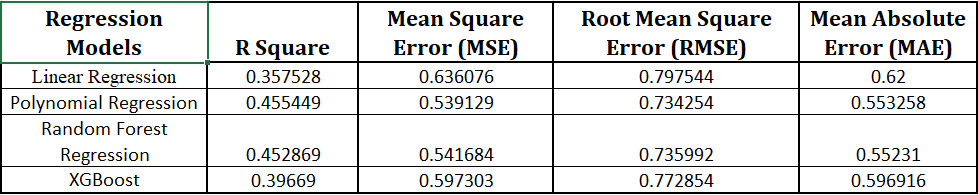

Since the Root mean square error (RMSE) is less of Polynomial Regression is less than the other models along with high R square we go wit it.

**Time Series**

*Making Time series Data*

In [ ]:
tsdata = atm.loc[:,['trans_month','trans_year','total_amount_withdrawn']]
tsdata

,trans_month,trans_year,total_amount_withdrawn
0,1,2011,897100
1,1,2011,826000
2,1,2011,754400
3,1,2011,834200
4,1,2011,575300
...,...,...,...
2239,9,2017,447400
2240,9,2017,153800
2241,9,2017,167100
2242,9,2017,317400


In [ ]:
tsmean = tsdata.groupby(['trans_year','trans_month']).sum() #Cummulative amunt withdrawn in a month
tsmean = pd.DataFrame(tsmean['total_amount_withdrawn'])
tsmean
tsmean1 = tsmean.values.astype('int')
tsmean1
tsmean1 = pd.DataFrame(tsmean1)
tsmean1

,0
0,14870100
1,13852800
2,16366000
3,15391400
4,18080800
...,...
76,7458600
77,6811100
78,7415700
79,7100200


In [ ]:
idx = pd.Series(pd.period_range('20110101', freq='M', periods=81))
idx

0     2011-01
1     2011-02
2     2011-03
3     2011-04
4     2011-05
       ...   
76    2017-05
77    2017-06
78    2017-07
79    2017-08
80    2017-09
Length: 81, dtype: period[M]

In [ ]:
dates = pd.to_datetime(idx.astype(str))
dates
dates = pd.DataFrame(dates)
dates

,0
0,2011-01-01
1,2011-02-01
2,2011-03-01
3,2011-04-01
4,2011-05-01
...,...
76,2017-05-01
77,2017-06-01
78,2017-07-01
79,2017-08-01


In [ ]:
tsdata1 = pd.concat([dates,tsmean1],axis = 1)
tsdata1.columns = ['date','total_amount_withdrawn']
tsdata1

,date,total_amount_withdrawn
0,2011-01-01,14870100
1,2011-02-01,13852800
2,2011-03-01,16366000
3,2011-04-01,15391400
4,2011-05-01,18080800
...,...,...
76,2017-05-01,7458600
77,2017-06-01,6811100
78,2017-07-01,7415700
79,2017-08-01,7100200


Text(0.5, 1.0, 'Total Amount Withdrawn Month-Wise ')

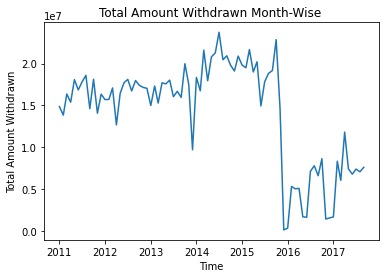

In [ ]:
plt.plot(tsdata1['date'],tsdata1['total_amount_withdrawn'])
plt.xlabel('Time')
plt.ylabel('Total Amount Withdrawn')
plt.title('Total Amount Withdrawn Month-Wise ')

Here we can see that one point changes falls below the range of the other data points and hence can be said as an outlier.

In [ ]:
tsdata1[70:]

,date,total_amount_withdrawn
70,2016-11-01,1468600
71,2016-12-01,100
72,2017-01-01,1719700
73,2017-02-01,8357800
74,2017-03-01,6076000
75,2017-04-01,11822400
76,2017-05-01,7458600
77,2017-06-01,6811100
78,2017-07-01,7415700
79,2017-08-01,7100200


In [ ]:
tsdata1.iloc[70,1]

1468600

Here we see that the total amount witrhdrawn for the month of December 2016 is far less than all the other values. Therefore we eliminate that value and impute it with the mean of of it's consecutive datapoints. 

In [ ]:
from statistics import mean
a = tsdata1.iloc[70,1]
b = tsdata1.iloc[72,1]
tsdata1.iloc[71,1] = mean([a,b])

In [ ]:
tsdata1[70:]

,date,total_amount_withdrawn
70,2016-11-01,1468600
71,2016-12-01,1594150
72,2017-01-01,1719700
73,2017-02-01,8357800
74,2017-03-01,6076000
75,2017-04-01,11822400
76,2017-05-01,7458600
77,2017-06-01,6811100
78,2017-07-01,7415700
79,2017-08-01,7100200


Text(0.5, 1.0, 'Total Amount Withdrawn Month-Wise ')

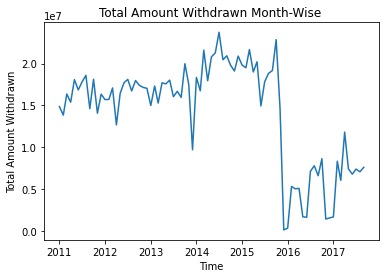

In [ ]:
plt.plot(tsdata1['date'],tsdata1['total_amount_withdrawn'])
plt.xlabel('Time')
plt.ylabel('Total Amount Withdrawn')
plt.title('Total Amount Withdrawn Month-Wise ')

In [ ]:
tsdata2 = tsdata1.set_index('date')
tsdata2

,total_amount_withdrawn
date,
2011-01-01,14870100
2011-02-01,13852800
2011-03-01,16366000
2011-04-01,15391400
2011-05-01,18080800
...,...
2017-05-01,7458600
2017-06-01,6811100
2017-07-01,7415700


*Durbin Watson Test to Check AutoCorrelation*

A test statistic of 2 indicates no serial correlation.
The closer the test statistics is to 0, the more evidence of positive serial correlation.
The closer the test statistics is to 4, the more evidence of negative serial correlation.

In [ ]:
#Durbin Watson Test to Check Autocorrelation
from statsmodels.stats.stattools import durbin_watson
taw = tsdata2['total_amount_withdrawn'].values
durbin_watson(taw)
#Since the test statistic is closer to 0,it means that there is some positive autocorrelation 

0.04739981889833792

*Looking for Trend and Seasonality in the data*

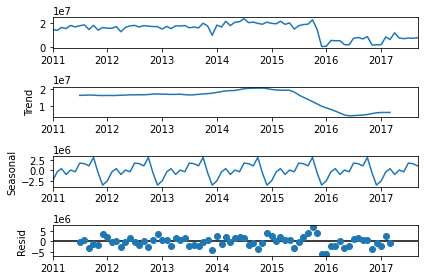

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
dec = seasonal_decompose(tsdata2,model = 'additive')
dec.plot()
plt.show()

#This shows us that we have a trend and seasonality present in our data

*Checking for Stationarity using ADF Test*

In [ ]:
#Checking whether the data is Stationary using ADF test
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(tsdata1['total_amount_withdrawn'].values, autolag= 'AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
   dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -2.436333
p-value                         0.131743
#Lags Used                      0.000000
Number of Observations Used    80.000000
Critical Value (1%)            -3.514869
Critical Value (5%)            -2.898409
Critical Value (10%)           -2.586439
dtype: float64


Since the pvalue is greater than 0.05 we fail to reject Ho and conclude that the series is non stationary.

*Splitting the data into Training and Test data*

In [ ]:
tsdata_train = tsdata2.iloc[0:72] #Considering all the data till 2016 as train data 
print(tsdata_train)
tsdata_test = tsdata2.iloc[72:] #Considerng all the 2017 data as test data
print(tsdata_test)

            total_amount_withdrawn
date                              
2011-01-01                14870100
2011-02-01                13852800
2011-03-01                16366000
2011-04-01                15391400
2011-05-01                18080800
...                            ...
2016-08-01                 7817300
2016-09-01                 6631200
2016-10-01                 8659400
2016-11-01                 1468600
2016-12-01                 1594150

[72 rows x 1 columns]
            total_amount_withdrawn
date                              
2017-01-01                 1719700
2017-02-01                 8357800
2017-03-01                 6076000
2017-04-01                11822400
2017-05-01                 7458600
2017-06-01                 6811100
2017-07-01                 7415700
2017-08-01                 7100200
2017-09-01                 7633300


*Making the Data Stationary*

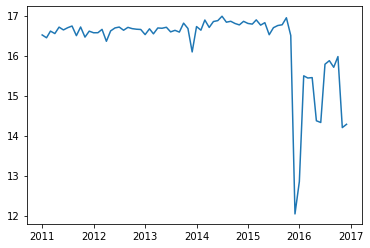

In [ ]:
#Transforming the data to reduce the trend 
ts_log = np.log(tsdata_train)
plt.plot(ts_log)      

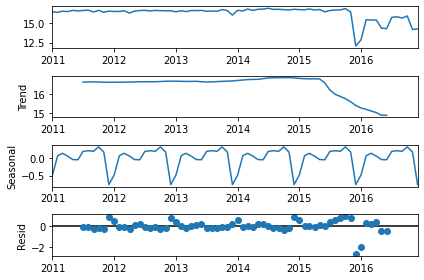

In [ ]:
dec = seasonal_decompose(ts_log,model = 'additive')
dec.plot()
plt.show()
#We can see that the trend has been smoothened a bit

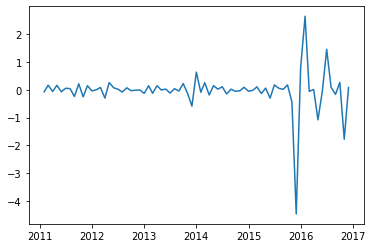

In [ ]:
#Differencing the data 
tslog_diff = ts_log - ts_log.shift(1)
tslog_diff
plt.plot(tslog_diff)

In [ ]:
tslog_diff = tslog_diff.dropna(axis = 0)
tslog_diff

,total_amount_withdrawn
date,
2011-02-01,-0.070865
2011-03-01,0.166719
2011-04-01,-0.061397
2011-05-01,0.161042
2011-06-01,-0.070286
...,...
2016-08-01,0.088682
2016-09-01,-0.164553
2016-10-01,0.266860


In [ ]:
#Checking whether the data is Stationary using ADF test
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(tslog_diff['total_amount_withdrawn'].values, autolag= 'AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
   dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -7.647351e+00
p-value                        1.827663e-11
#Lags Used                     3.000000e+00
Number of Observations Used    6.700000e+01
Critical Value (1%)           -3.531955e+00
Critical Value (5%)           -2.905755e+00
Critical Value (10%)          -2.590357e+00
dtype: float64


Since the pvalue is less than 0.05 we reject Ho and conclude that the series is stationary.

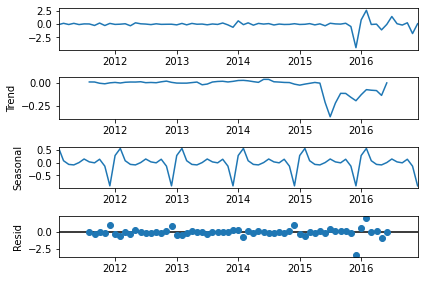

In [ ]:
dec = seasonal_decompose(tslog_diff,model = 'additive')
dec.plot()
plt.show()

*Making ACF And PACF plots*

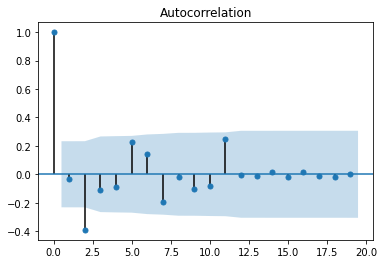

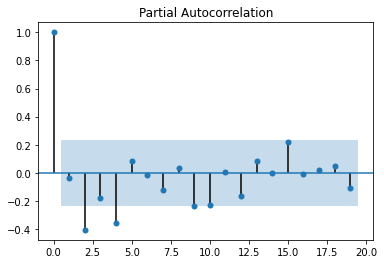

In [ ]:
#ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(tslog_diff)
plot_pacf(tslog_diff)
plt.show()

*Fitting Arima Model*

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
!pip3 install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
model = auto_arima(tsdata_train,stepwise= True,stationary= True)
model.fit(tsdata_train)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   72
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1183.293
Date:                Wed, 23 Sep 2020   AIC                           2372.587
Time:                        18:42:54   BIC                           2379.417
Sample:                             0   HQIC                          2375.306
                                 - 72                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.982e+06   1.56e-09   1.27e+15      0.000    1.98e+06    1.98e+06
ar.L1          0.8584      0.026     33.654      0.000       0.808       0.908
sigma2      1.097e+13   3.25e-16   3.38e+28      0.000     1.1e+13     1.1e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):                73.63
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               4.51   Skew:                            -1.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [ ]:
stepwise_model = auto_arima(tsdata_train,seasonal=True, trace=True,m = 12,
                           error_action='ignore', stationary = True,
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2379.304, Time=0.96 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2451.583, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2374.500, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2422.018, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2597.510, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2372.587, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2374.544, Time=0.07 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2376.350, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=2373.502, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=2373.219, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=2420.024, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=2374.924, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=2376.183, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 1.505 seconds


Here we can see we get ARIMA(1,0,0)(0,0,0)[12] , SARIMA(1,0,0) with the least AIC value.

In [ ]:
forecast = model.predict(n_periods= len(tsdata_test))
forecast
forecast = forecast.astype('int')
print(forecast)
forecast = pd.DataFrame(forecast,index = tsdata_test.index,columns=['Prediction'])
forecast

[ 3350529  4858255  6152530  7263574  8217325  9036053  9738873 10342193
 10860101]


,Prediction
date,
2017-01-01,3350529
2017-02-01,4858255
2017-03-01,6152530
2017-04-01,7263574
2017-05-01,8217325
2017-06-01,9036053
2017-07-01,9738873
2017-08-01,10342193
2017-09-01,10860101


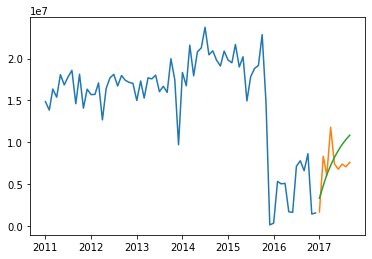

In [ ]:
#plot the predictions for validation set
plt.plot(tsdata_train, label='Train')
plt.plot(tsdata_test, label='Test')
plt.plot(forecast, label='Prediction')
plt.show()

*Evaluating the model*

In [ ]:
#Calculating RMSE
from math  import sqrt 
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(tsdata_test,forecast)
print('Mean Square Error',mse)
rmse = sqrt(mse)
print('Root mean square error:',rmse)

print('Mean Absolute Error:',mean_absolute_error(tsdata_test,forecast))


Mean Square Error 7504571704983.889
Root mean square error: 2739447.335683584
Mean Absolute Error: 2393486.111111111
